In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime


In [2]:
tmdb_data = pd.read_csv('tmdb-movies.csv')
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
tmdb_data.drop(labels = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],axis =1,inplace =True)
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [4]:
tmdb_data.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
tagline           object
runtime            int64
genres            object
release_date      object
release_year       int64
dtype: object

In [5]:
tmdb_data.drop_duplicates(inplace=True)
tmdb_data.duplicated().sum()

0

In [6]:
temp_list=['budget', 'revenue']
tmdb_data[temp_list] = tmdb_data[temp_list].replace(0, np.NAN)
tmdb_data.dropna(subset = temp_list, inplace = True)
tmdb_data.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [7]:
tmdb_data.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


In [8]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])
tmdb_data.head()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15064\2631358094.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [9]:
tmdb_data['runtime'] =tmdb_data['runtime'].replace(0, np.NAN)
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [10]:
change_type=['budget', 'revenue']
tmdb_data[change_type]=tmdb_data[change_type].applymap(np.int64)
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
tmdb_data.to_csv('tmdb-movies-new.csv', index= False)

## 2-Movies with largest and lowest budgets

In [26]:
# Note: I selected the top 10 movies with the largest budgets
sorted_by_budget = tmdb_data.sort_values('budget', ascending=False)
top_10_budget_movies = sorted_by_budget.head(10)
top_10_budget_movies['original_title'].head(10)


2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
14                          Avengers: Age of Ultron
6570                               Superman Returns
1929                                        Tangled
4411                                    John Carter
7394                                   Spider-Man 3
5508                                The Lone Ranger
1389         Harry Potter and the Half-Blood Prince
Name: original_title, dtype: object

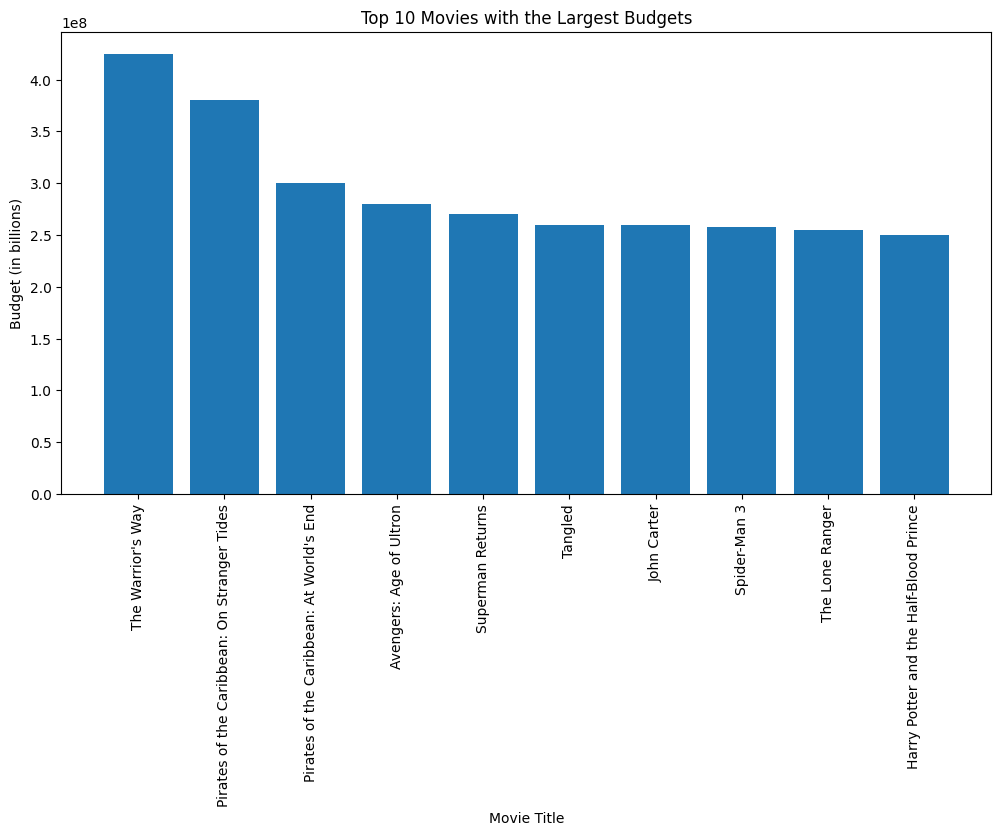

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_budget_movies['original_title'], top_10_budget_movies['budget'])
plt.xlabel('Movie Title')
plt.ylabel('Budget (in billions)')
plt.title('Top 10 Movies with the Largest Budgets')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Note: I selected the top 10 movies with the lowest budgets
lowest_10_budget_movies = sorted_by_budget.tail(10)
lowest_10_budget_movies['original_title'].head(10)


5852                           Hross Ã­ oss
5162                            Kid's Story
10297    National Lampoon's Loaded Weapon 1
8125                           The Prophecy
8235                    Tales from the Hood
2398                                    Boy
10050    Tales from the Darkside: The Movie
8944                           Death Wish 2
2618                           Lost & Found
3581                Love, Wedding, Marriage
Name: original_title, dtype: object

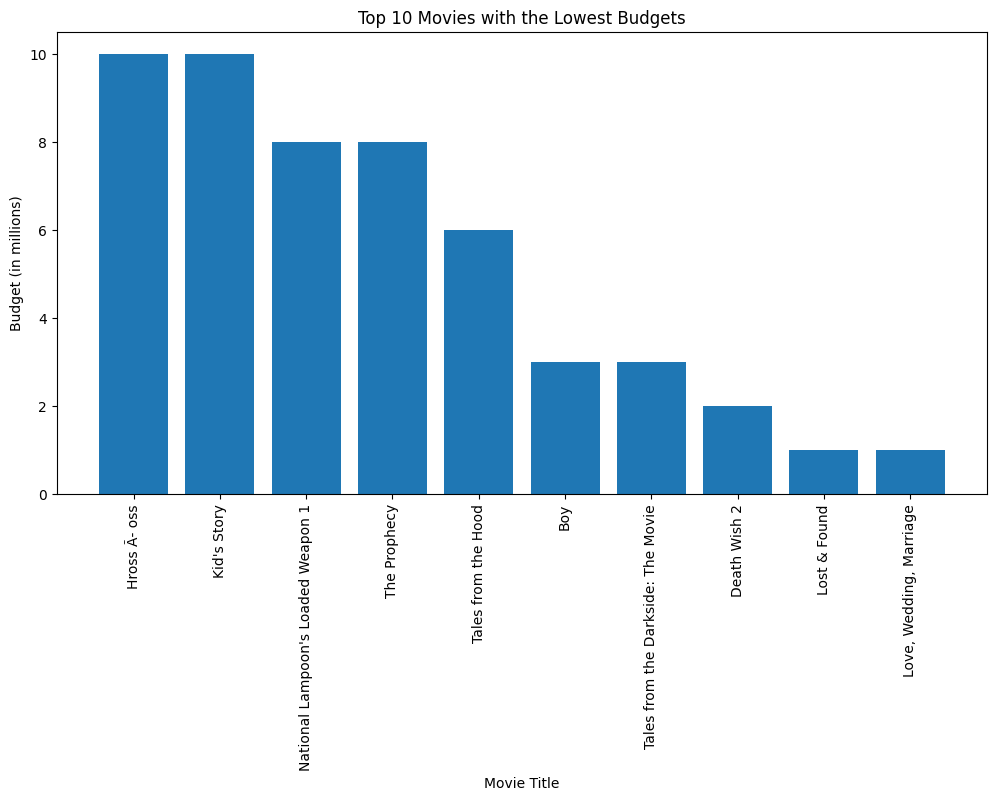

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(lowest_10_budget_movies['original_title'], lowest_10_budget_movies['budget'])
plt.xlabel('Movie Title')
plt.ylabel('Budget (in millions)')
plt.title('Top 10 Movies with the Lowest Budgets')
plt.xticks(rotation=90)
plt.show()

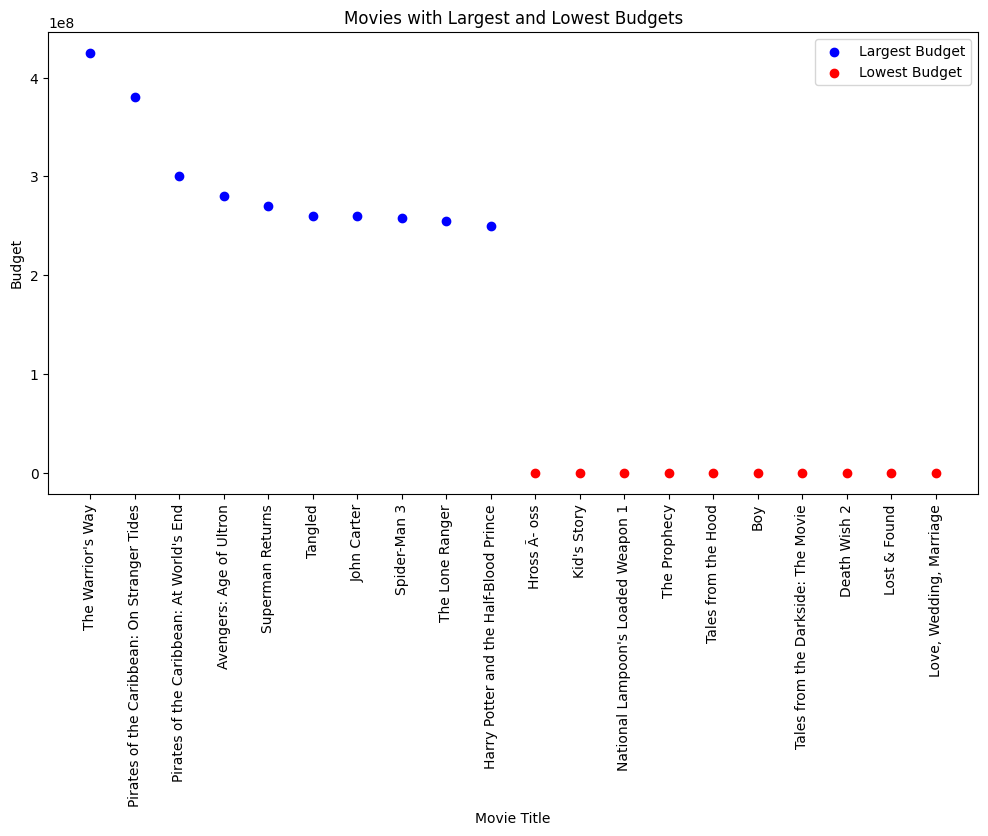

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(top_10_budget_movies['original_title'], top_10_budget_movies['budget'], label='Largest Budget', color='blue')
plt.scatter(lowest_10_budget_movies['original_title'], lowest_10_budget_movies['budget'], label='Lowest Budget', color='red')
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.title('Movies with Largest and Lowest Budgets')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# The x-axis will represent the movie titles, and the y-axis will represent the budget.
# The movies with the largest budget in blue and the movies with the lowest budget in red.


## 5-Average runtime of all the movies.

In [30]:
average_runtime = tmdb_data['runtime'].mean()
average_runtime


109.22029060716139

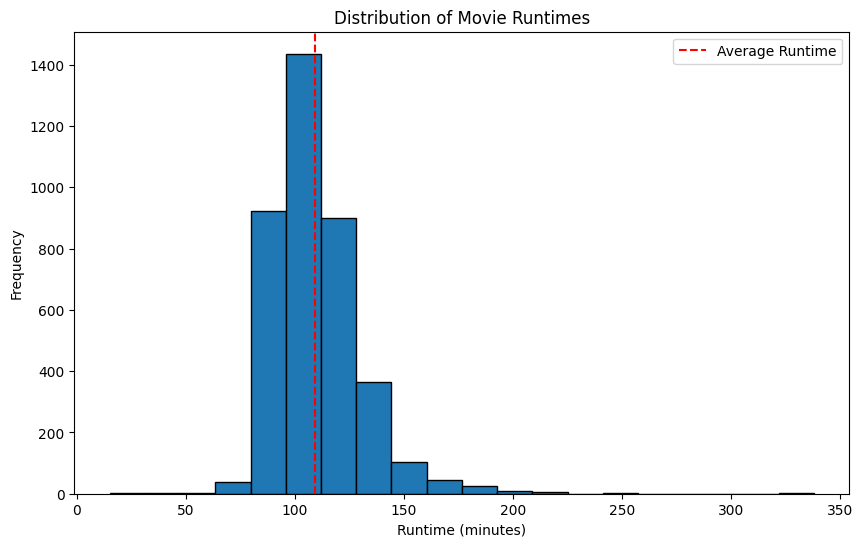

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(tmdb_data['runtime'], bins=20, edgecolor='k')
plt.axvline(average_runtime, color='red', linestyle='--', label='Average Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.legend()
plt.show()

# Note: The red dashed line represents the average runtime


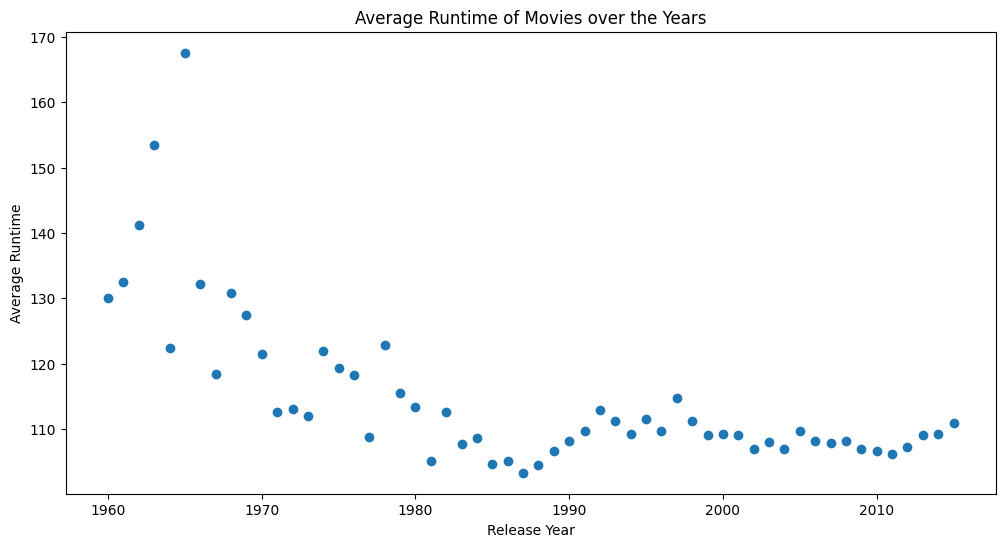

In [43]:
avg_runtime = tmdb_data.groupby('release_year')['runtime'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(avg_runtime['release_year'], avg_runtime['runtime'])
plt.xlabel('Release Year')
plt.ylabel('Average Runtime')
plt.title('Average Runtime of Movies over the Years')
plt.show()

# This scatter plot will visualize the trend of the average movie runtime over the years
# The release year on the x-axis and the average runtime on the y-axis



#### In earlier years, movies tended to have shorter runtimes, possibly due to different storytelling and filmmaking conventions.


#### In recent years, movies have generally had longer runtimes, potentially reflecting changes in audience preferences and the ability to accommodate more complex narratives.


## 6-Most frequent cast (with respest to the profitable movies)

In [33]:
profitable_movies = tmdb_data[tmdb_data['revenue'] > tmdb_data['budget']]

# Extract cast information
cast_data = profitable_movies['cast'].str.split('|', expand=True).stack().value_counts()
top_cast = cast_data.head(10)
top_cast

# Note: I selected top 10 most frequent cast members


Robert De Niro       38
Bruce Willis         33
Tom Hanks            33
Tom Cruise           31
Samuel L. Jackson    30
Brad Pitt            30
Denzel Washington    29
Harrison Ford        28
Morgan Freeman       28
Cameron Diaz         27
Name: count, dtype: int64

#### Here, we filter the dataset to include only the profitable movies based on the revenue and budget

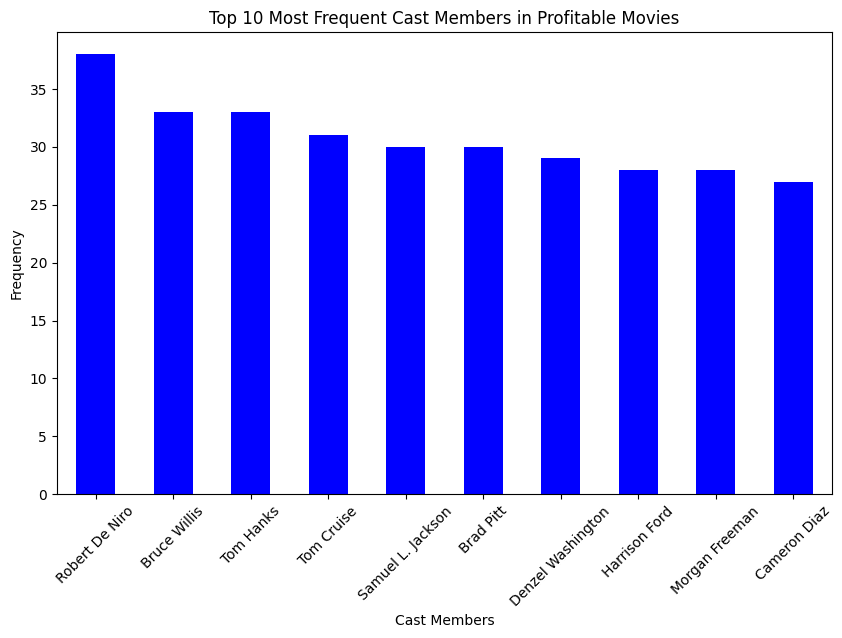

In [34]:
plt.figure(figsize=(10, 6))
top_cast.plot(kind='bar', color='blue')
plt.xlabel('Cast Members')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Cast Members in Profitable Movies')
plt.xticks(rotation=45)
plt.show()

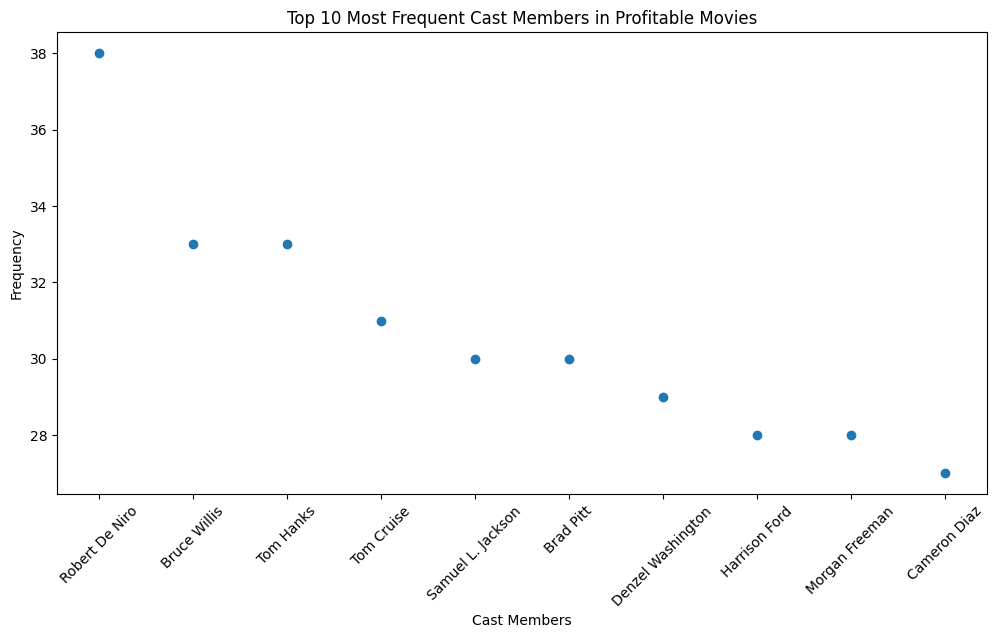

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(top_cast.index, top_cast.values)
plt.xlabel('Cast Members')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Cast Members in Profitable Movies')
plt.xticks(rotation=45)
plt.show()

# The cast members on the x-axis and the frequency on the y-axis.
